In [354]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [370]:
#for loop to retrieve lists of top 2000 movie titles and corresponding revenues
top_mov = ['', '?offset=200', '?offset=400', '?offset=600', '?offset=800', '?offset=1000', '?offset=1200', '?offset=1400', '?offset=1600', '?offset=1800']
list_of_titles = []
list_of_revenue = []
for i in top_mov:
    rev_url = 'https://www.boxofficemojo.com/chart/top_lifetime_gross/{}'.format(i)
    rev_page = requests.get(rev_url)
    revsoup = BeautifulSoup(rev_page.content, 'html.parser')
    rev_title = revsoup.find_all('td', class_='a-text-left mojo-field-type-title')
#                             ('a', class_='a-link-normal')
    practice_titles =[]
    for title in rev_title:
        practice_titles.append(title.text)    
    list_of_titles_and_years = practice_titles#[15:-11]
#     list_of_titles_and_years
    for value in list_of_titles_and_years:
        #if value < "1000" or value > "2020": 
        list_of_titles.append(value)
    rev_money = revsoup.find_all('td', class_='a-text-right mojo-field-type-money')
#     practice_money = []
    for revenue in rev_money:
        list_of_revenue.append(revenue.text)

In [411]:
list_of_revenue

In [458]:
list_of_titles

In [422]:
#created dicts, 1 of each for movie titles and revenues
title_dict = {'Movie Title': list_of_titles}
revenue_dict = {'Revenue': list_of_revenue}

In [461]:
#dataframe of titles
top_titles = pd.DataFrame.from_dict(title_dict)
top_titles

In [462]:
#created dataframe of revenue without non-int values so it can be used in visuals
top_rev = pd.DataFrame.from_dict(revenue_dict)
top_rev = [int(x.replace('$', '').replace(',', '')) for x in top_rev['Revenue']]
true_rev = {'Revenue': top_rev}
true_top_rev = pd.DataFrame.from_dict(true_rev)
true_top_rev

In [463]:
#concat the dataframes to create 1 dataframe with both datasets
top2000_unclean = pd.concat([top_titles, true_top_rev], axis = 1)
top2000 = top2000_unclean.set_index('Movie Title')
top2000 = top2000.reset_index()
top2000

In [487]:
#for loop for APIs to get general info about a huge dataset of movies
list_of_jsons =[]
for i in range(1,501):
    if i==67 or i==247 or i==248 or i==324 or i==325 or i==332 or i==455:
        continue
    response = requests.get(f"https://api.themoviedb.org/3/discover/movie?page={i}&api_key=26321807a85638c70b1948a5b58528f4")
    data = response.json()['results']
    for y in range(0,20):
        list_of_jsons.append({'Movie Title': data[y]['title'], 'popularity': data[y]['popularity'], 'vote_count': data[y]['vote_count'], 'vote_average':data[y]['vote_average'],
                             'language': data[y]['original_language'], 'genre_ids': data[y]['genre_ids']})
tmdb=pd.DataFrame(list_of_jsons)
# tmdb

In [488]:
# merged the API dataframe and the revenue dataframe and aligned the sets through the common 'Movie Title' column 
df = pd.merge(top2000_unclean, tmdb, on=['Movie Title'])
df

,Movie Title,Revenue,popularity,vote_count,vote_average,language,genre_ids
0,Avengers: Endgame,858373000,60.263,11429,8.3,en,"[28, 12, 878]"
1,Avatar,760507625,30.910,20405,7.4,en,"[28, 12, 14, 878]"
2,Black Panther,700059566,41.837,14346,7.4,en,"[28, 12, 14, 878]"
3,Avengers: Infinity War,678815482,102.134,16915,8.3,en,"[28, 12, 878]"
4,Titanic,659363944,34.914,16038,7.8,en,"[18, 53, 10749]"
...,...,...,...,...,...,...,...
2006,Sherlock Gnomes,43242871,11.666,422,5.5,en,"[16, 14, 10751]"
2007,Point Break,43218387,12.976,1860,7.1,en,"[28, 80, 53]"
2008,Point Break,43218387,11.748,1405,5.7,en,"[28, 80, 53]"
2009,Biloxi Blues,43184798,6.821,119,6.4,en,"[35, 18, 10749]"


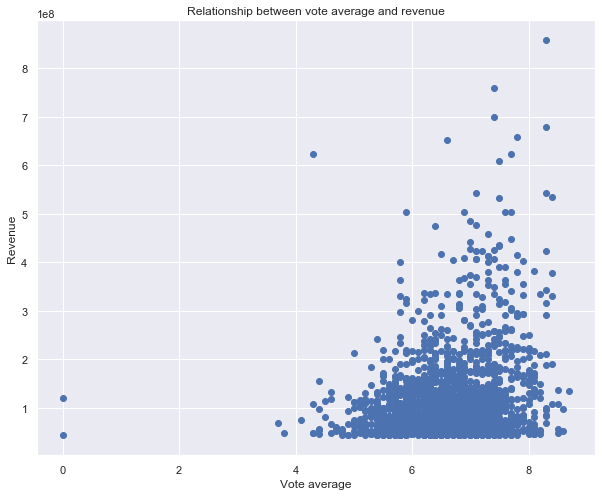

In [450]:
fig, ax = plt.subplots(figsize=(10,8))

ax.scatter(df['vote_average'], df['Revenue'])
ax.set_xlabel('Vote average')
ax.set_ylabel('Revenue')
ax.set_title('Relationship between vote average and revenue')
plt.show()

In [233]:
pd.DataFrame(df).to_csv('Top Grossing Movies.csv')

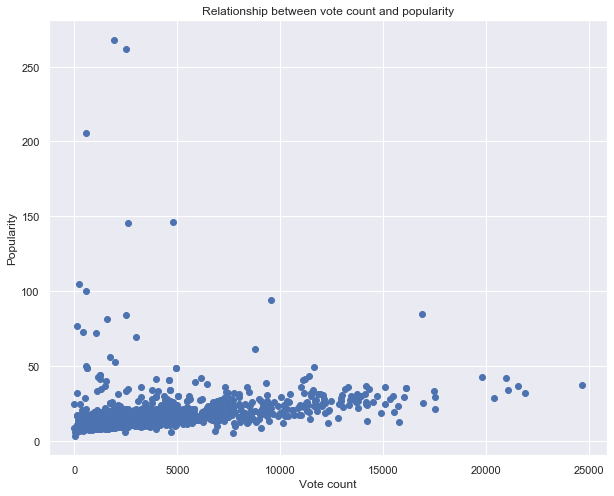

In [342]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(df['vote_count'], df['popularity'])
ax.set_xlabel('Vote count')
ax.set_ylabel('Popularity')
ax.set_title('Relationship between vote count and popularity')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

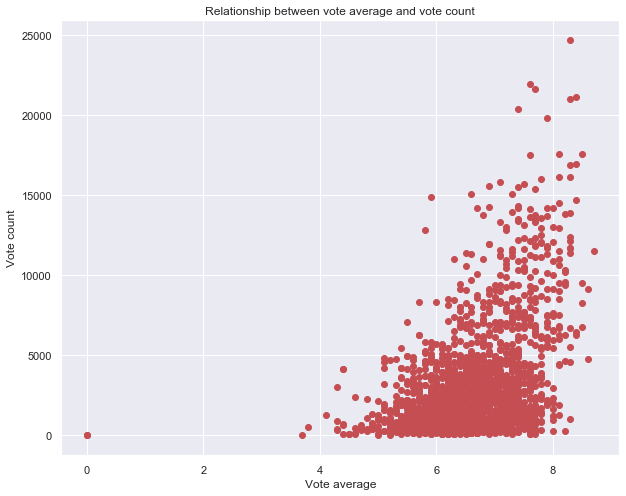

In [345]:
fig, ax=plt.subplots(figsize=(10,8))
ax.scatter(df['vote_average'], df['vote_count'], color='r')
ax.set_xlabel('Vote average')
ax.set_ylabel('Vote count')
ax.set_title('Relationship between vote average and vote count')
plt.show

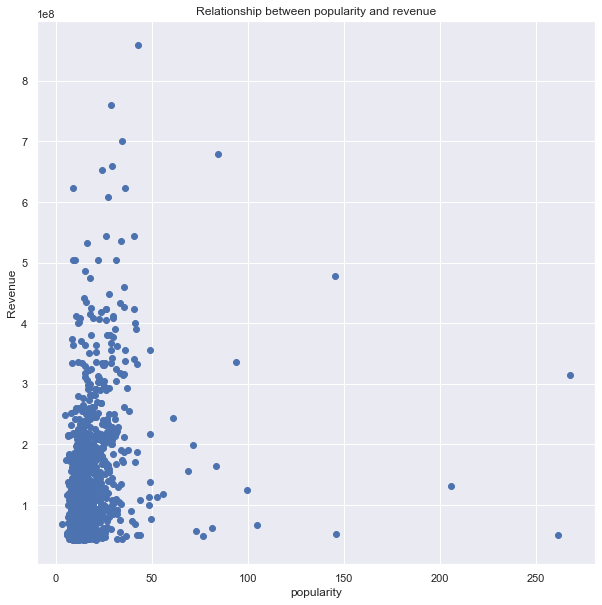

In [455]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df['popularity'], df['Revenue'], color='b')
ax.set_xlabel('popularity')
ax.set_ylabel('Revenue')
ax.set_title('Relationship between popularity and revenue')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

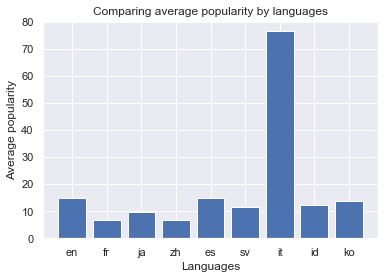

In [483]:
un=df['language'].unique()
un
lang=df.groupby('language')['popularity'].mean().values
lang
fig, ax = plt.subplots()
ax.bar(un, lang)
ax.set_xlabel('Languages')
ax.set_ylabel("Average popularity")
ax.set_title('Comparing average popularity by languages')
plt.show

In [489]:
#stuff left to to do according to rubric
#business problem: if public opinion has effect on sales/ possible if language has effect on revenue or popularity
# readme: what the project was, our objective to accomplish, skills required to complete (pythong, web scraping, visualisation), what we posted on github, questions we posed, data we collected, how we put our data together, our recommendations to the Microsoft, how we arrived to our conclusion, steps i would take if i had more time
#drawing conclusions
#presentation